# 3. 유의성 검정

### 1) T-test

#### 가. 정규성 검정
 - Kolmogorov-Smirnov : $ n \geq 50 $
 - Q-Q Plot
 - Anderson-Darling
 - Sharpiro-Wilk : $ n \leq 50 $
 - Jarque-Bera
 
#### 나. 등분산 검정
 - F-test
 - Levene
 - Bartlett
 - Chi-Square
 
 ※ 등분산성을 만족하지 못할 때 : Welch 2 sample T-test
 
#### 다. 일표본 T 검정

#### 라. 독립표본 T 검정

#### 마. 대응표본 T 검정 (Paired T-test)

In [ ]:
data1 = [1, 2, 3, 4, 5]
data2 = [6, 7, 8, 9, 10]

In [5]:
# Kolmogorov-Smirnov
    # 두 표본이 같은 분포를 따르는지 검정 (정규분포에 국한되지 않음)
import scipy.stats as stats

data1 = [1, 2, 3, 4, 5]
data2 = [6, 7, 8, 9, 10]

ks_test = stats.ks_2samp(data1, data2)

KstestResult(statistic=1.0, pvalue=0.007936507936507936, statistic_location=5, statistic_sign=1)

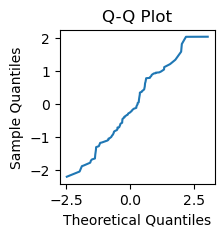

In [23]:
# Q-Q Plot
import numpy as np
import matplotlib.pyplot as plt

data = np.random.normal(0, 1, 100)

plt.figure(figsize = (2, 2))
plt.plot(np.sort(data), np.quantile(np.random.standard_normal(100), np.arange(0, 1, 1/100)))
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [26]:
# Anderson-Darling
import numpy as np
from scipy.stats import anderson

data = np.random.randn(100)

anderson(data, 'norm')

AndersonResult(statistic=0.43827448534874236, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-0.08250561559293257, scale=1.106289510469872)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [29]:
# Shapiro-Wilk
from scipy.stats import shapiro

data = [1.2, 2.3, 3.4, 4.5, 5.6]

shapiro(data)

ShapiroResult(statistic=0.9867621660232544, pvalue=0.9671739339828491)

In [31]:
# Jarque-Bera : 왜도와 첨도로 정규성 파악
from scipy.stats import jarque_bera

jarque_bera(data)

SignificanceResult(statistic=0.35208333333333347, pvalue=0.8385830416490585)

In [37]:
# Levene
    # 정규성 여부와 관계없이 사용 가능
    # 3개 이상의 그룹들에 대한 등분산 검정도 가능
from scipy.stats import levene

levene(data1, data2)

LeveneResult(statistic=0.5404595240201706, pvalue=0.46311221792731483)

In [38]:
# Bartlett
from scipy.stats import bartlett

bartlett(data1, data2)

BartlettResult(statistic=0.04105707459852017, pvalue=0.8394277932871025)

In [47]:
# Chi-Square
    # 정규성 여부에 민감하다.
from scipy.stats import chi2

def pvar_test(sample, var0, alpha=0.5):
    u_var = np.var(sample, ddof = 1)
    n = len(sample)
    rv = stats.chi2(df = n - 1)
    interval = rv.interval(1-alpha)
    y = (n-1) * u_var / var0
    
    if interval[0] <= y <= interval[1]:
        print('귀무가설 채택')
    else:
        print('귀무가설 기각')
        
    if y < rv.isf(0.5):
        p = rv.cdf(y) * 2
    else:
        p = (1-rv.cdf(y)) * 2
        
    print(f'p값: {p:.3f}')
    print(f'검정통계량 값 : {y:.3f}')
    print('임계값 :', interval)

In [51]:
# Welch 2 sample
    # 이분산일 때 사용
from scipy.stats import ttest_ind

ttest_ind(data1, data2, equal_var = False)

Ttest_indResult(statistic=0.09939524858695828, pvalue=0.9209250574218479)

In [53]:
# 일표본 T 검정
from scipy.stats import ttest_1samp

ttest_1samp(data1, 0)

TtestResult(statistic=18.472798652278378, pvalue=7.554461430804318e-34, df=99)

In [55]:
# 독립표본 T 검정
from scipy.stats import ttest_ind

ttest_ind(data1, data2)

Ttest_indResult(statistic=0.09939524858695828, pvalue=0.9209250155427562)

In [56]:
# 대응표본 T 검정
from scipy.stats import ttest_rel

ttest_rel(data1, data2)

TtestResult(statistic=0.09413348771073901, pvalue=0.925193374696294, df=99)

### 2) 분산분석 (ANOVA)

#### 분산분석 (Analysis of Variance)
특성치의 산포를 요인별로 분해하여 요인별 영향도를 규명하는 방법으로 여러 그룹 간의 평균의 차이를 통계적으로 검정한다.

개별 관측치 - 전체 평균 = 그룹 간 편차 - 그룹 내 편차 (잔차, Residual)

① 정규성 / ② 등분산성 / ③ 독립성이 전제되어야 함.

#### 가. 일원배치 분산분석
 - 분산분석표
 - 사후검정 (Post-Hoc) : Duncan, Tukey, Bonferroni, Scheffe
 
 ※ FWER (FamilyWise Error Rate) : 여러 개의 가설검정을 할 때, 최소 1개 이상의 가설에서 제1종 오류가 발생할 가능성 - 결과 해석 시 $ \alpha $로 보면 됨.
 
#### 나. 이원배치 분산분석
 - 분산분석표
 - 교호작용
 
#### 다. 이분산일 때의 분산분석
 - Welch's ANOVA

In [58]:
# F-test (Using Scipy)
from scipy.stats import f_oneway

data1 = np.random.rand(100)
data2 = np.random.rand(100)
data3 = np.random.rand(50)

f_oneway(data1, data2, data3)

F_onewayResult(statistic=0.15147786506699715, pvalue=0.8595166831758904)

In [74]:
# ANOVA (Using Statsmodels) - 일원배치 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import pandas as pd

df = pd.DataFrame(data, columns=['value', 'treatment'])
print(df.shape)

# the "C" indicates categorical data
model = ols('value ~ C(treatment)', df).fit()
anova_lm(model)

(22, 2)


,df,sum_sq,mean_sq,F,PR(>F)
C(treatment),2.0,15515.766414,7757.883207,3.711336,0.043589
Residual,19.0,39716.097222,2090.320906,NaN,NaN


In [78]:
# ANOVA (Using Statsmodels) - 이원배치
df2 = pd.DataFrame(data, columns=['head_size', 'fetus', 'observer'])
print(df2.shape)

formula = 'head_size ~ C(fetus) + C(observer) + C(fetus) : C(observer)'
model2 = ols(formula, df2).fit()

print(anova_lm(model2))

(36, 3)
                        df      sum_sq     mean_sq            F        PR(>F)
C(fetus)               2.0  324.008889  162.004444  2113.101449  1.051039e-27
C(observer)            3.0    1.198611    0.399537     5.211353  6.497055e-03
C(fetus):C(observer)   6.0    0.562222    0.093704     1.222222  3.295509e-01
Residual              24.0    1.840000    0.076667          NaN           NaN


In [ ]:
# 사후검정 1. Duncan
    # 집단을 가장 적극적으로 분리하는 방법. 면밀히 나누고 싶을 때 사용할 것.

In [106]:
# 사후검정 2. Tukey's HSD
    # 집단 내 관측치 수가 동일한 경우 사용
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(df['value'], df['treatment'], alpha = 0.05)

print(tukey)
#fig = tukey.plot_simultaneous()
    # 그룹 1, 2에서만 통계적으로 유의미한 차이를 보인다.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper  reject
------------------------------------------------------
   1.0    2.0 -60.1806 0.0355  -116.619 -3.7421   True
   1.0    3.0  -38.625 0.3215 -104.8404 27.5904  False
   2.0    3.0  21.5556 0.6802  -43.2295 86.3406  False
------------------------------------------------------


In [105]:
# 사후검정 3. Bonferroni
    # 집단 내 관측치 수가 동일하지 않은 경우 사용
from statsmodels.sandbox.stats.multicomp import MultiComparison
from scipy.stats import ttest_ind

# 사후분석을 위한 준비
comp = MultiComparison(df['value'], df['treatment'])

comp.allpairtest(ttest_ind, method = 'bonf')[0]

group1,group2,stat,pval,pval_corr,reject
1.0,2.0,2.5582,0.0218,0.0655,False
1.0,3.0,1.3266,0.2115,0.6346,False
2.0,3.0,-1.0725,0.3046,0.9138,False


In [ ]:
# 사후검정 4. Scheffe
    # 집단을 가장 보수적으로 분리하는 방법. 지나치게 보수적이어서 잘 쓰지 않음.
    # Bonferroni 대신 사용하기도 함.

### 3) 교차분석

#### 가. 적합도 검정 (Goodness-of-Fit Test)

 - $ k $개의 범주를 갖는 한 개의 요인에 대하여 어떤 분포를 갖는지 검정한다. 
 - 관찰된 비율 값이 기댓값과 같은지 검정
 - 일원 카이제곱검정

#### 나. 독립성 검정 (교차표)

 - 두 개의 범주형 변수 간의 독립성 여부 검정 (상관분석처럼 생각할 것)
 - 이원 카이제곱검정

#### 다. 동질성 검정 (교차표)

 - 두 개의 범주형 변수의 확률분포 동일성 여부 검정

In [1]:
import pandas as pd 

df3 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e3_p3_1.csv')
df3.head()

,ID,투약전,투약후
0,user_1,55.137,56.106
1,user_2,66.584,60.409
2,user_3,52.259,50.639
3,user_4,77.081,69.164
4,user_5,62.677,57.622


In [ ]:
# 적합도 검정 (Goodness-of-Fit Test)
from scipy.stats import chisquare

chisquare

### 4) 다중검정

#### 다중검정?

여러 개의 가설검정을 동시에 수행하는 것.  
ANOVA 실시 후의 다중비교가 해당됨.

다중검정의 문제 : 가설의 수가 많아질수록 전체 오류율이 커지게 되는 문제 발생.

#### 가. FWER 통제  → 사후분석 참고

#### 나. FDR (False Discovery Rate) 조절

 - Benjamini-Hochberg (FDR 추정)
 
 ※ $ FDR = E(\frac{False \; Positives}{Total \; Positives}) $

In [121]:
# Benjamini-Hochberg
    # 개별 가설들의 p-value를 정렬한 후, 이에 대해 긱각 다른 Cutoff를 적용한다.
    # p-value가 낮을수록 더 엄격한 Cutoff가 적용됨. (FDR을 0.05로 고정)
from statsmodels.stats.multitest import fdrcorrection

p_val = anova_lm(model2).iloc[:, -1].values

adj_p_val = fdrcorrection(p_val, alpha = 0.05)
print(adj_p_val)

(array([ True,  True, False, False]), array([nan, nan, nan, nan]))


### 5) 공분산분석, 상관분석

#### 가. 공분산분석 (ANCOVA / Analysis of Covariance)

 - 공변량 : 종속변수에 영향을 주는 독립변수 외의 잡음인자에 대한 변량
 - Noise를 통제하여 본래 비교하고 싶었던 독립변수와 종속변수 간의 관계를 순수하게 비교한다. (분산분석과 회귀분석의 혼합 형태)
 - Step  
   ① 독립변수와 종속변수에 대한 회귀분석 실시  
   ② 잔차에 대한 ANOVA 실시
 - Assumption  
   ① 정규성 / ② 등분산성 / ③ 독립성  
   ④ 회귀계수의 동질성 (Homogeneity, 공변량과 독립변수 간의 교호작용 없음)

#### 나. 상관분석

 - Pearson  
 - Spearman
 - Kendalls' Tau

In [6]:
# ANCOVA
import numpy as np
import pandas as pd
 
df4 = pd.DataFrame({'methodology': np.repeat(['A', 'B', 'C'], 4),
                     'current_grade': [67, 88, 75, 85,
                                       92, 77, 74, 88,
                                       91, 88, 82, 80],
                     'test_score': [77, 89, 74, 69,
                                    88, 93, 94, 90,
                                    85, 81, 83, 79]})

display(df4)

from pingouin import ancova

result = ancova(data = df4, dv = 'test_score', covar = 'current_grade'
               , between = 'methodology')

result

,methodology,current_grade,test_score
0,A,67,77
1,A,88,89
2,A,75,74
3,A,85,69
4,B,92,88
5,B,77,93
6,B,74,94
7,B,88,90
8,C,91,85
9,C,88,81


,Source,SS,DF,F,p-unc,np2
0,methodology,387.510992,2,6.005703,0.025542,0.600228
1,current_grade,1.404669,1,0.043540,0.839927,0.005413
2,Residual,258.095331,8,NaN,NaN,NaN


 - SS : Sum of Squares
 - p-unc : Uncorrected P-value
 - np2 : Partial $\eta$-squared

In [9]:
# Correlation Coefficient

## 1. Pearson
from sklearn import datasets
import scipy.stats as stats

df5_temp = datasets.load_diabetes()
df5 = pd.DataFrame(data = df5_temp['data'], index = df5_temp['target']
                  , columns = df5_temp['feature_names'])

stats.pearsonr(df5['bmi'].values, df5.index.values)

PearsonRResult(statistic=0.5864501344746886, pvalue=3.4660064451673575e-42)

In [ ]:
## 2. Spearman
